In [1]:
mars_data <- read.csv(file = 'phase1-multicoll-miscal.csv')
head(mars_data)

HistMean,HistVar,LaplVar,MaxLapl,MaxVar,MaxAvgLapl,IQR,Deviation,C1AreaProp,C4AreaProp,...,SurfNumKP,AkazeNumKP,KazeNumKP,ORBNumKP,RidgeAreaProp,AvgMaxX,MaxY,MinVar,Filename,Output
124.5651,3446.0276,683.56405,49.671860,108.27338,72.915329,102,1.079373433,0.2825928,0.3572388,...,74,0,2,57,0.5682006,55846,48318,106.63466,ESP_011432_0925_RED.NOMAP.browse-Block-2.jpg,1
100.6365,432.0618,921.22565,38.867615,87.19965,62.500552,24,1.115293952,0.2268677,0.3392334,...,41,0,0,59,0.5237166,47415,41991,114.57064,ESP_011432_0925_RED.NOMAP.browse-Block-4.jpg,1
156.2239,2593.7113,87.66853,19.000961,277.06616,57.093912,74,1.987564767,0.3372803,0.3393555,...,66,2,23,6,0.5324758,338709,127896,670.03112,ESP_012552_1220_RED.NOMAP.browse-Block-2.jpg,1
120.5034,2324.4243,109.82227,45.709412,377.36621,77.971224,63,2.025717675,0.3389282,0.3405762,...,70,1,42,22,0.5488710,176680,105657,365.09620,ESP_012552_1220_RED.NOMAP.browse-Block-8.jpg,1
168.2359,3252.6966,156.87512,3.302185,28.54234,8.528706,77,1.126242137,0.1130371,0.3049927,...,36,0,15,0,0.3251600,46178,35370,39.99748,ESP_012618_1090_RED.NOMAP.browse-Block-1.jpg,1
143.6928,2195.0803,150.31938,25.720566,230.28404,78.175985,70,0.004028197,0.3345947,0.3375244,...,57,2,43,26,0.6316024,229650,154707,631.63512,ESP_012618_1090_RED.NOMAP.browse-Block-10.jpg,1


In [2]:
colnames(mars_data)

[1] "HistMean"      "HistVar"       "LaplVar"       "MaxLapl"      
 [5] "MaxVar"        "MaxAvgLapl"    "IQR"           "Deviation"    
 [9] "C1AreaProp"    "C4AreaProp"    "SiftNumKP"     "SurfNumKP"    
[13] "AkazeNumKP"    "KazeNumKP"     "ORBNumKP"      "RidgeAreaProp"
[17] "AvgMaxX"       "MaxY"          "MinVar"        "Filename"     
[21] "Output"

In [3]:
model <- glm(Output~HistMean+LaplVar+MaxVar+MaxAvgLapl+IQR+Deviation+C1AreaProp+C4AreaProp+SiftNumKP+SurfNumKP+AkazeNumKP+KazeNumKP+ORBNumKP+RidgeAreaProp+AvgMaxX+MaxY+MinVar, family=binomial, data=mars_data)
summary(model)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = Output ~ HistMean + LaplVar + MaxVar + MaxAvgLapl + 
    IQR + Deviation + C1AreaProp + C4AreaProp + SiftNumKP + SurfNumKP + 
    AkazeNumKP + KazeNumKP + ORBNumKP + RidgeAreaProp + AvgMaxX + 
    MaxY + MinVar, family = binomial, data = mars_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8629  -0.1132  -0.0151  -0.0001   2.6384  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -7.742e+00  3.731e+00  -2.075  0.03799 *  
HistMean      -5.469e-03  7.548e-03  -0.724  0.46876    
LaplVar       -1.672e-03  1.140e-03  -1.466  0.14273    
MaxVar        -1.487e-03  6.363e-04  -2.337  0.01946 *  
MaxAvgLapl    -1.622e-02  7.719e-03  -2.102  0.03559 *  
IQR           -3.102e-03  9.857e-03  -0.315  0.75298    
Deviation      1.909e-05  1.210e-04   0.158  0.87467    
C1AreaProp    -1.569e+01  8.069e+00  -1.945  0.05176 .  
C4AreaProp     1.475e+01  1.515e+01   0.974  0.33023    
SiftNumKP     -3.121e-02  1.141

In [4]:
dffits = data.frame(influence.measures(model)[1])$infmat.dffit
dffits_threshold = 2*(20*length(dffits)^(1/2))
hat_diag =  data.frame(influence.measures(model)[1])$infmat.hat
hat_diag_threshold = 2*(20/length(hat_diag))

In [5]:
res = residuals(model)

In [6]:
print("Diagonising by dffits")
for(i in 1:length(dffits))
{
        if (abs(dffits[i]) > dffits_threshold)
            print(i)
}
print("Diagnosing by hat matrix")
for(i in 1:length(hat_diag))
{
        if (abs(hat_diag[i]) > hat_diag_threshold)
            {
                if (abs(res[i]) > 2)
                    {
                        print(i)
                    }
            }
}

[1] "Diagonising by dffits"
[1] "Diagnosing by hat matrix"
[1] 14
[1] 39
[1] 77


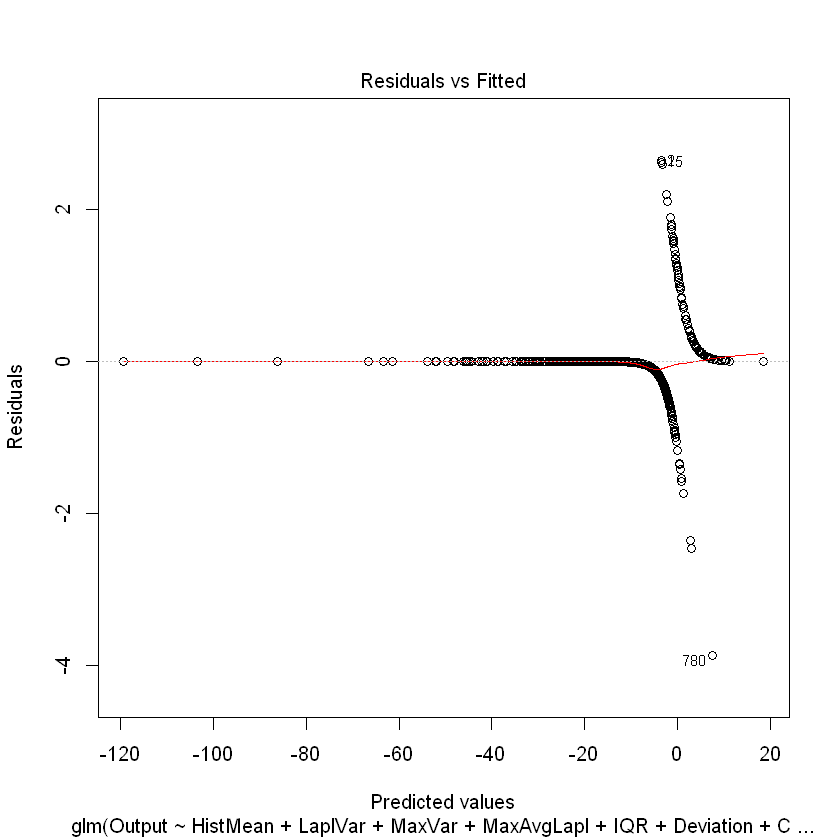

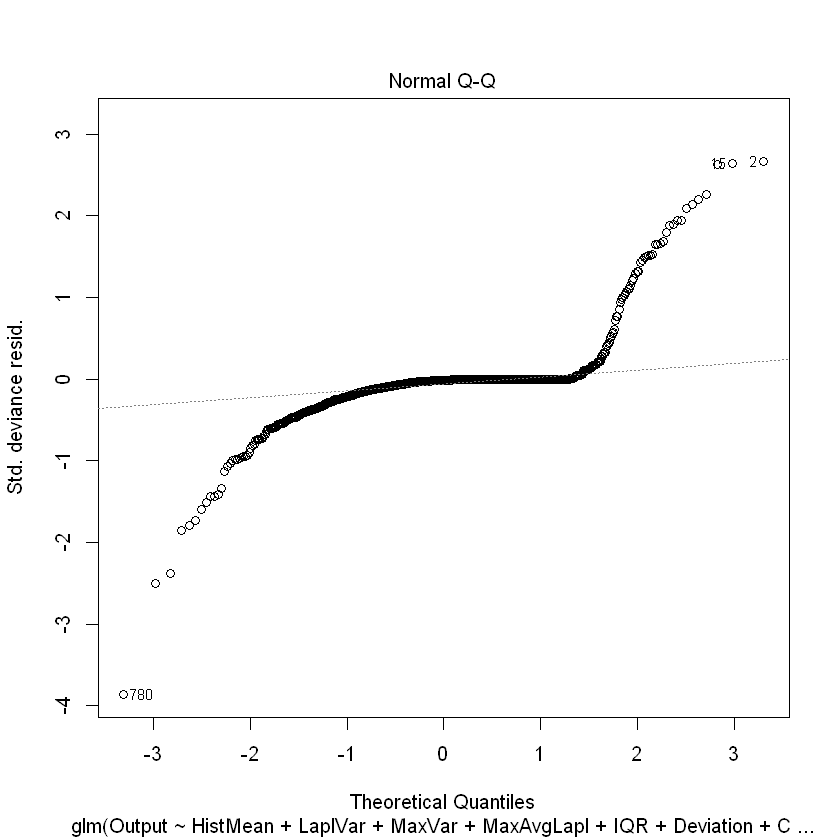

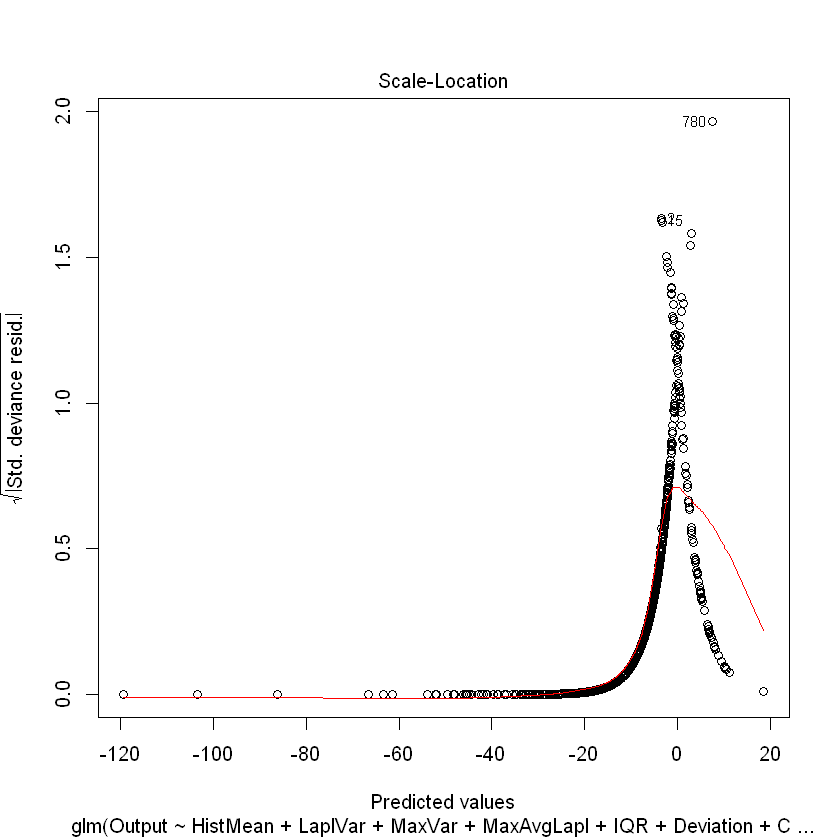

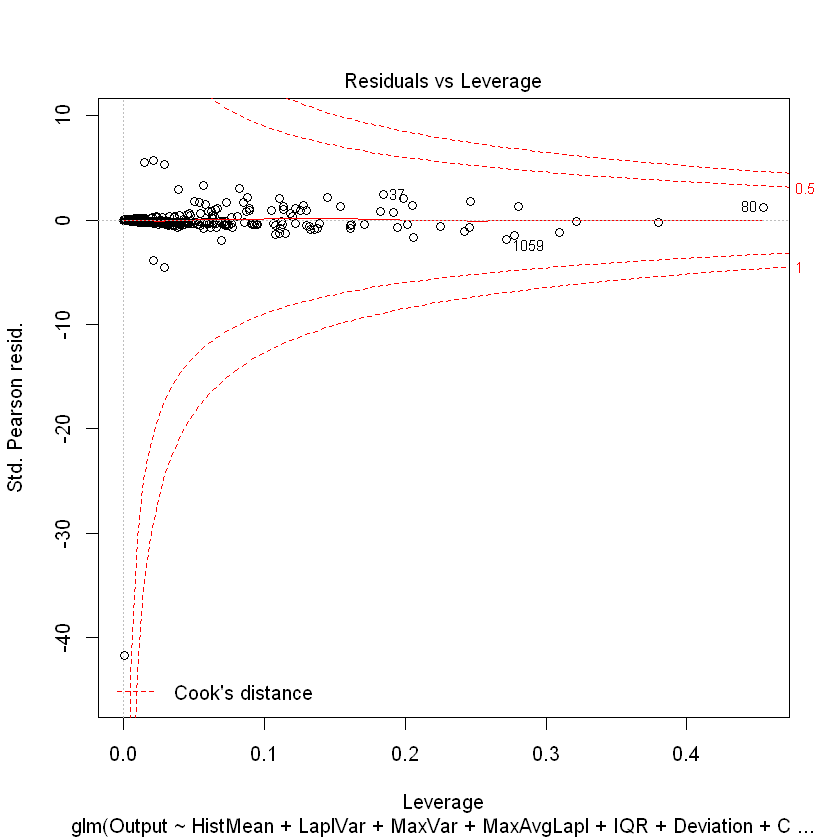

In [7]:
plot(model)